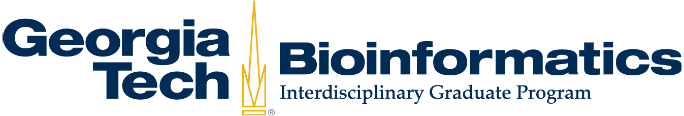

## Accessing bioinformatics databases

### BIOS 4150/BIOL 6150
#### Instructor: Dr. King Jordan
#### TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)


---

# **1. Accessing and Downloading Data from Sequence Read Archive (SRA)**
### *50 points*


---

<div class="alert alert-block alert-info">
    <h2>SRA and sratoolkit</h2>
    
</div>

<div class="alert alert-block alert-info">    
    <p>Sequence Read Archive (SRA) is NIH's archive of high-throughput sequencing data and is part of the International Nucleotide Sequence Database Collaboration (INSDC) that includes the NCBI Sequence Read Archive (SRA), the European Bioinformatics Institute (EBI), and the DNA Database of Japan (DDBJ). Data submitted to any of the three organizations are shared among them.</p>
    
It is important to understand how data is stored in the SRA, and how it can be downloaded.</p> 
    
<br>

<b>1</b>: Publications which submit their RNA-seq data to the SRA are indexed as bioprojects such as one shown here <i>https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA714081</i>

<b>2</b>: Within this bioproject, you can check the number of sequencing runs (15 in this case), and get access to their SRR or SRX IDs

<b>3</b>: This demo will only show how to download sequencing reads from one run, but if you can get all the SRR IDs (by using a package like here: <i>https://www.bioconductor.org/packages/release/bioc/html/SRAdb.html</i>), you can download them in parallel.
    
    
</div>



<div class="alert alert-block alert-warning">
    <h3>PRJ ID (eg:  PRJNA714081)</h3>
    <p>refers to a Project Identifier in the context of genomic and sequencing data repositories like the Sequence Read Archive (SRA) maintained by the National Center for Biotechnology Information (NCBI).</p>
    <h3>SRX ID (eg:  SRX10332168)</h3>
    <p>SRX records provide a high-level overview of the sequencing study but do not contain the actual sequence data itself (wet lab run info)</p>
    <h3>SRR ID (eg:  SRR13953403)</h3>
    <p>Sequence Read Run, SRR records contain the actual sequence data, quality scores, and additional metadata specific to that particular sequencing run (fastq)</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>1.1 Please download your files in your own scratch directory</h3>
    <p>You can delete these files after the demo session today. These files will not be needed later</p>
</div>

In [1]:
#Check where you want to download you files.

!ls $HOME/scratch/
!ls ~/scratch/


prep.txt  TestDataDownload
prep.txt  TestDataDownload


<div class="alert alert-block alert-warning">
    <h3>1.2 Use <i>prefetch</i> from sra-toolkit to get a local copy of the SRA file</h3>
</div>

In [2]:
! ~/biol6150/SharedEnvironment/bin/sratoolkit.3.0.7-ubuntu64/bin/prefetch --help

Usage:
  prefetch [options] <SRA accession> [...]
  Download SRA files and their dependencies

  prefetch [options] --cart <kart file>
  Download cart file

  prefetch [options] <URL> --output-file <FILE>
  Download URL to FILE

  prefetch [options] <URL> [...] --output-directory <DIRECTORY>
  Download URL or URL-s to DIRECTORY

  prefetch [options] <SRA file> [...]
  Check SRA file for missed dependencies and download them


Options:
  -T|--type <value>                Specify file type to download. Default: sra 
  -t|--transport <http|fasp|both>  Transport: one of: fasp; http; both 
                                   [default]. (fasp only; http only; first try 
                                   fasp (ascp), use http if cannot download 
                                   using fasp). 
  --location <value>               Location of data. 

  -N|--min-size <size>             Minimum file size to download in KB 
                                   (inclusive). 
  -X|--max-size <size>     

In [14]:
#Run the prefetch command.

!~/biol6150/SharedEnvironment/bin/sratoolkit.3.0.7-ubuntu64/bin/prefetch SRR13953403 -O $HOME/scratch/TestDataDownload/


2023-09-08T07:26:37 prefetch.3.0.7: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-09-08T07:26:37 prefetch.3.0.7: 1) Downloading 'SRR13953403'...
2023-09-08T07:26:37 prefetch.3.0.7: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-09-08T07:26:37 prefetch.3.0.7:  Downloading via HTTPS...
2023-09-08T07:28:18 prefetch.3.0.7:  HTTPS download succeed
2023-09-08T07:28:20 prefetch.3.0.7:  'SRR13953403' is valid
2023-09-08T07:28:20 prefetch.3.0.7: 1) 'SRR13953403' was downloaded successfully
2023-09-08T07:28:20 prefetch.3.0.7: 'SRR13953403' has 0 unresolved dependencies


<div class="alert alert-block alert-warning">
    <h3>1.3 Check the <i>sra</i> file fectched</h3>
</div>

In [15]:
!ls -lh ~/scratch/TestDataDownload/SRR13953403

total 831M
-rw-r--r-- 1 ssharma454 gtperson 831M Sep  8 03:28 SRR13953403.sra


<div class="alert alert-block alert-warning">
    <h3>1.4 We will use <i>fasterq-dump</i> to extract fastq file from the sra file fectched</h3>
</div>

In [16]:
!~/biol6150/SharedEnvironment/bin/sratoolkit.3.0.7-ubuntu64/bin/fasterq-dump --help


Usage:
  fasterq-dump <path> [options]
  fasterq-dump <accession> [options]

Options:
  -F|--format                      format (special, fastq, default=fastq) 
  -o|--outfile                     output-file 
  -O|--outdir                      output-dir 
  -b|--bufsize                     size of file-buffer dflt=1MB 
  -c|--curcache                    size of cursor-cache dflt=10MB 
  -m|--mem                         memory limit for sorting dflt=100MB 
  -t|--temp                        where to put temp. files dflt=curr dir 
  -e|--threads                     how many thread dflt=6 
  -p|--progress                    show progress 
  -x|--details                     print details 
  -s|--split-spot                  split spots into reads 
  -S|--split-files                 write reads into different files 
  -3|--split-3                     writes single reads in special file 
  --concatenate-reads              writes whole spots into one file 
  -Z|--stdout                      p

In [17]:
#Run the fasterq-dump command.
!~/biol6150/SharedEnvironment/bin/sratoolkit.3.0.7-ubuntu64/bin/fasterq-dump -O ~/scratch/TestDataDownload/SRR13953403/ ~/scratch/TestDataDownload/SRR13953403/SRR13953403.sra


<div class="alert alert-block alert-warning">
    <h3>1.5 Check the fastq file generated</h3>
</div>

In [18]:
!ls -lh ~/scratch/TestDataDownload/SRR13953403/


total 1.9G
-rw-r--r-- 1 ssharma454 gtperson 1016M Sep  8 03:31 SRR13953403.fastq
-rw-r--r-- 1 ssharma454 gtperson  831M Sep  8 03:28 SRR13953403.sra


## **2. Basic Analytics on the SRA data**
### *50 points*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Look at the file and make sure it's a fastq (and not a PNG)</h3>
</div>

In [19]:
#Head the file.
!head ~/scratch/TestDataDownload/SRR13953403/SRR13953403.fastq

@SRR13953403.1 1 length=237
AGAAGGACTCTATTCTCTATAACAGAAGTGGGAGCCTTGGACAACTGAACGCCTATCTCTAGCTCAAGAAATGTCAGCTCTTTTTTTTTTTTTGAGACTGTCACCCAGCGGGCCCAACAAGCAAGAAAGGAGTCTTTGGACAGTGGTGAGTTATCTCAGGCACCCACTTTTCTTTCACGTTTTCAAATGAAGATGGAGAGACCACTGAAAACAGACTAGAAATACATCTGTTTGTGG
+SRR13953403.1 1 length=237
77:3:3899;<<=9<@=>?>=9<<<<9;899*//0)/495==>9=<<=9==<7<=<<<<>><?=B@9>?B8<<@<<@><9999999999999$9;;=889<=9;94///98168287<=5:::4:::*707;;;<@8@@;;;=<=7><@<<6<<<<<<=9@<<<7;====188>6;:<<<==4:;=7==>7==<<8<<<<<<7<<=7777)7;<<===777)7:78666<=@7<<=8
@SRR13953403.2 2 length=113
CCCGACTGGGTGACAGTCTCAAAAAAAAAGAAAGAGCTGACATTTCTTGAGCTAGAGATAGGCGTTCAGTTGTCCAAGGCTCCCACTTCTGTTATAGAGAATAGAGTCCTTCT
+SRR13953403.2 2 length=113
8828<<=>@8?===>=<=>994444444$---)---/////9;<7;=8<<==>=======>9>>>9====9<<<9=9=8=<<<7<===><==9@?=====9>======9=7<<
@SRR13953403.3 3 length=111
CCCGACTGGGTGACAGTCTCAAAAAAAAAAGAAGCTGACATTTCTTGAGCTAGAGATAGGCGTTCAGTTGTCCAAGGCTCCCACTTCTGTTATAGAGAATAGAGTCCTTCT


<div class="alert alert-block alert-warning">
    <h3>2.2 Count the number of entries in the fastq file</h3>
</div>

In [27]:
#We'll grep for just the headers of each read.
!cat ~/scratch/TestDataDownload/SRR13953403/SRR13953403.fastq | grep "@SRR13953403" | wc -l


3040953


<div class="alert alert-block alert-warning">
    <h3>2.3 Look at only the sequences in the fastq file</h3>
</div>

In [23]:
#Extract the sequences and write them to a file called SRR13953403.sequences
!cat ~/scratch/TestDataDownload/SRR13953403/SRR13953403.fastq | awk '{ if ((NR+2) % 4 == 0) print $0}' > ~/scratch/TestDataDownload/SRR13953403/SRR13953403.sequences


In [26]:
#Look at the file SRR13953403.sequences created above
!head ~/scratch/TestDataDownload/SRR13953403/SRR13953403.sequences
!wc ~/scratch/TestDataDownload/SRR13953403/SRR13953403.sequences


AGAAGGACTCTATTCTCTATAACAGAAGTGGGAGCCTTGGACAACTGAACGCCTATCTCTAGCTCAAGAAATGTCAGCTCTTTTTTTTTTTTTGAGACTGTCACCCAGCGGGCCCAACAAGCAAGAAAGGAGTCTTTGGACAGTGGTGAGTTATCTCAGGCACCCACTTTTCTTTCACGTTTTCAAATGAAGATGGAGAGACCACTGAAAACAGACTAGAAATACATCTGTTTGTGG
CCCGACTGGGTGACAGTCTCAAAAAAAAAGAAAGAGCTGACATTTCTTGAGCTAGAGATAGGCGTTCAGTTGTCCAAGGCTCCCACTTCTGTTATAGAGAATAGAGTCCTTCT
CCCGACTGGGTGACAGTCTCAAAAAAAAAAGAAGCTGACATTTCTTGAGCTAGAGATAGGCGTTCAGTTGTCCAAGGCTCCCACTTCTGTTATAGAGAATAGAGTCCTTCT
CCCGACTGGGTGACAGTCTCAGAAAAAAAA
CACTGTAACTTCAAACTCCTGGGTTCAAGCAATCTTTCTGCCTCAGCCTCCTGAGTAGCTGGGGCTGTAGATGCATGGCCACCACACCTGGCTAATTTTATTTTTTGTAGAGACGGGATTTTGCTGTGTTGCC
CACTGTAACTTCAAACTCCTGGGTTCAAGCAATCTTTCTGCCTCAGCCTCCTGAGTAGCTGGGGCTGTAGATGCATGGCCACCACACCTGGCTAATTTTATTTTTTTGTAGAGACGGGATTTTTGCTGTGTTGCCC
GCCTCTCTTTTTGGTTTCTTGTTGCATTTGAATC
GTAAAAACTCCCCAAACACTCTTCCACCGATCGCTTACTTCAAGAAAGAAAGTAAGCTGCCGGAAGCCCCAGACACCCAGGAA
AATTCCAGCACTTTAAGAGGCCAAAGCAGGAGGACTGCTGGAGGCCAGGAGTTAGAGACCAACCTAGGCAACACAGCAAGACCGCATCTCTACGAAAAATGAAAATATTAGCTAG

In [30]:
#Create a file with length of each sequence present in SRR13953403.sequences
!awk '{ print length }' ~/scratch/TestDataDownload/SRR13953403/SRR13953403.sequences > ~/scratch/TestDataDownload/SRR13953403/SRR13953403.sequences.length.txt

#Get the average read sequence length using the file ~/scratch/TestDataDownload/SRR13953403/SRR13953403.sequences.length.txt
!awk '{ total += $1 } END { print total/NR }' ~/scratch/TestDataDownload/SRR13953403/SRR13953403.sequences.length.txt


134.784


# **3.  Accessing and Downloading Data from 1000 Genomes Project**
### *50 points*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Go to the 1000 genomes website and explore what information they have. <br>Check out the following links</h3>
    <p>1. https://www.internationalgenome.org/data (to know where and how the data can be accessed)</p>
    <p>2. https://www.internationalgenome.org/data-portal/population (to see from where the data was sequenced)</p>
    <p>3. https://www.internationalgenome.org/data-portal/sample/HG00152 (to see what data is present for each 1000 genome sample)</p>
    <p>4. https://www.internationalgenome.org/ (understand what made this project monumental)</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>3.2 List the files at FTP location endpoint for the individual: NA18505</h3>
</div>

## Try going to this FTP link to see the files:

 http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/

In [39]:
!curl -l ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18505/sequence_read/ | head
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3792    0  3792    0     0   2123      0 --:--:--  0:00:01 --:--:--  2123
ERR000659.filt.fastq.gz
ERR000659_1.filt.fastq.gz
ERR000659_2.filt.fastq.gz
ERR000660.filt.fastq.gz
ERR000660_1.filt.fastq.gz
ERR000660_2.filt.fastq.gz
ERR000661.filt.fastq.gz
ERR000661_1.filt.fastq.gz
ERR000661_2.filt.fastq.gz
ERR000662.filt.fastq.gz


<div class="alert alert-block alert-warning">
    <h3>3.3 Download the file SRR716649_1.filt.fastq.gz for the individual NA18505 from the FTP site</h3>
</div>

Command: `!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18505/sequence_read/SRR716649_1.filt.fastq.gz -o ~/scratch/TestDataDownload/SRR716649_1.filt.fastq.gz`

In [31]:
#Download the file.
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18505/sequence_read/SRR716649_1.filt.fastq.gz

--2023-09-08 03:43:25--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18505/sequence_read/SRR716649_1.filt.fastq.gz
           => ‘SRR716649_1.filt.fastq.gz’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.193.167
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.193.167|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18505/sequence_read ... done.
==> SIZE SRR716649_1.filt.fastq.gz ... 1267770781
==> PASV ... done.    ==> RETR SRR716649_1.filt.fastq.gz ... done.
Length: 1267770781 (1.2G) (unauthoritative)

100%[====================================>] 1,267,770,781 25.3MB/s   in 52s    

2023-09-08 03:44:18 (23.4 MB/s) - ‘SRR716649_1.filt.fastq.gz’ saved [1267770781]



In [33]:
#Check the file that you just downloaded.
!ls -lh

total 1.2G
-rw-r--r-- 1 ssharma454 gtperson 3.1M Sep  8 03:41 DataExploration.ipynb
-rw-r--r-- 1 ssharma454 gtperson 1.2G Sep  8 03:44 SRR716649_1.filt.fastq.gz


In [34]:
#Move the file to your scratch.
!mv SRR716649_1.filt.fastq.gz ~/scratch/TestDataDownload/SRR716649_1.filt.fastq.gz

<div class="alert alert-block alert-warning">
    <h3>3.4 Check the fastq file and make sure it looks good</h3>
</div>

In [35]:
#Check the fastq file downloaded.
!zcat ~/scratch/TestDataDownload/SRR716649_1.filt.fastq.gz | head

@SRR716649.1 HWI-ST1133:257:H062GADXX:2:1101:1257:1969/1
TGAGGAGTTGCAGGAAATTTATGAGGTGTCAGACATGTATCAGCTGACATCTCTCTTTGAGGAATGCTCTCGGTTTTTGGCCCGCACAGTGCAAGTGGGAA
+
CCCFFEFFHHGHHJIJJIJJJJJIJJFGHIJIIJIJJIJJJJJJJJJJJJJJJJJIJJJJIJFHHIFGGHIJJHHHFFFDEEDDDDDDDDDDDDDDDDDBD
@SRR716649.2 HWI-ST1133:257:H062GADXX:2:1101:1316:1980/1
TCACAGCCACACATCCTGGGGCTGTGTCGATGCTCATGGCAGGACATCTGCAGGTGCTGTCAGCATGGGGTTCTGGGCAGCTGTGGGGTGGAGGCTGCAGG
+
@@@DFFFFFBBFDFGHIIGIIIIDE@EEHCH@DBGEG<@FCGHID@CCBCH@FG.@EGD@CE@?EHCDD?AC@CCDDDD=?>:CCDBD59BB<@DDDDC>?
@SRR716649.3 HWI-ST1133:257:H062GADXX:2:1101:1330:1985/1
GACCTCACCACCCACCTTTGCTTCATCGTTGATGTCCCATGTGAAGGAAATGGCGTTATACGCAATCTCCTCGATGTTACTGATAGTGTTGAAGCTTTCTT

gzip: stdout: Broken pipe
